<a href="https://colab.research.google.com/github/nishith135/Shape-Detection-and-Object-Counting-using-Connected-Component-Labeling-and-Shape-Descriptors/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

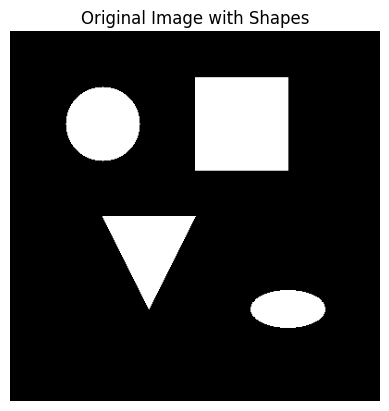

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic image with shapes (or replace with dataset image)
img = np.zeros((400, 400, 3), dtype=np.uint8)

# Draw shapes
cv2.circle(img, (100, 100), 40, (255, 255, 255), -1)  # Circle
cv2.rectangle(img, (200, 50), (300, 150), (255, 255, 255), -1)  # Square
pts = np.array([[150, 300], [100, 200], [200, 200]], np.int32)
cv2.fillPoly(img, [pts], (255, 255, 255))  # Triangle
cv2.ellipse(img, (300, 300), (40, 20), 0, 0, 360, (255, 255, 255), -1)  # Ellipse

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image with Shapes")
plt.axis("off")
plt.show()

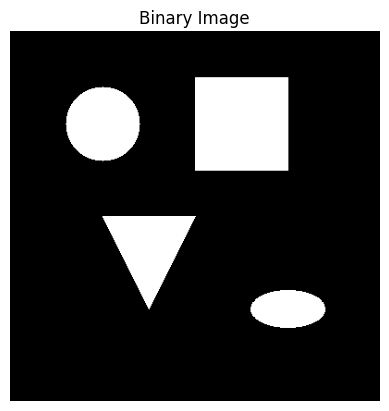

In [2]:
# Step 2: Convert to grayscale and threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

In [3]:
# Step 3: Connected Component Labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)

print(f"Total objects detected: {num_labels - 1}")  # subtract background

Total objects detected: 4


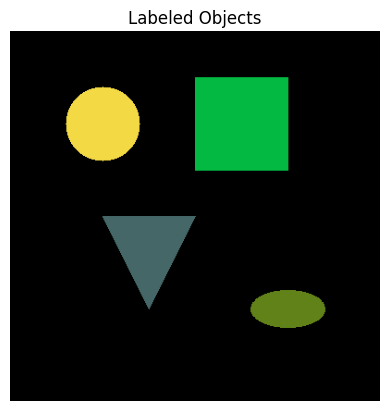

In [4]:
# Step 4: Visualize labeled objects
output = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)

for i in range(1, num_labels):  # skip background
    mask = labels == i
    output[mask] = np.random.randint(0, 255, 3)

plt.imshow(output)
plt.title("Labeled Objects")
plt.axis("off")
plt.show()

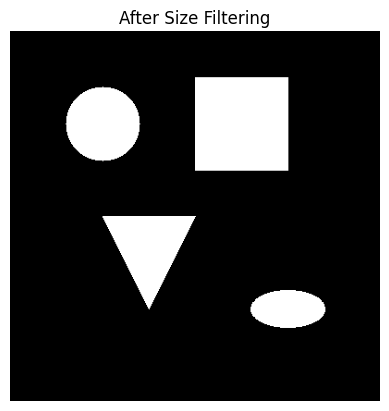

In [5]:
# Step 5: Size Filtering (remove small objects)
min_size = 300  # adjust threshold
filtered = np.zeros_like(binary)

for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        filtered[labels == i] = 255

plt.imshow(filtered, cmap='gray')
plt.title("After Size Filtering")
plt.axis("off")
plt.show()


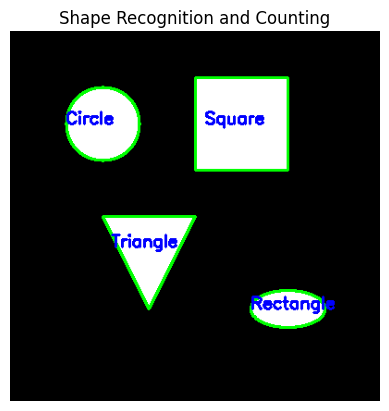

In [9]:
# Step 6: Shape Recognition using Moments
contours, _ = cv2.findContours(filtered, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result_img = img.copy()
font = cv2.FONT_HERSHEY_SIMPLEX

for contour in contours:
    # Compute Moments
    M = cv2.moments(contour)
    if M['m00'] == 0:
        continue
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    # Compute Hu Moments (shape descriptor)
    hu = cv2.HuMoments(M).flatten()

    # Identify shape by approximation
    approx = cv2.approxPolyDP(contour, 0.04*cv2.arcLength(contour, True), True)
    shape = "Unidentified"
    sides = len(approx)

    if sides == 3:
        shape = "Triangle"
    elif sides == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w/float(h)
        shape = "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
    elif sides > 6:
        shape = "Circle"
    else:
        shape = "Ellipse"

    # Draw contour and label
    cv2.drawContours(result_img, [contour], -1, (0, 255, 0), 2)
    cv2.putText(result_img, shape, (cx-40, cy), font, 0.6, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title("Shape Recognition and Counting")
plt.axis("off")
plt.show()